In [ ]:
import torch 
import torch.nn as nn 
import torch.optim as optim 

import matplotlib 
import matplotlib.pyplot as plt 

import tqdm 

In [ ]:
mlp = nn.Sequential(
    nn.Linear(in_features=1, out_features=100), # y = w @ x + b, y \in R^3, x \in R^4, b \in R^3, w \in R^3x4
    nn.LeakyReLU(),
    nn.Linear(in_features=100, out_features=100),
    nn.LeakyReLU(),
    nn.Linear(in_features=100, out_features=50),
    nn.LeakyReLU(),
    nn.Linear(in_features=50, out_features=1)
)

In [ ]:
def create_quad(n: int, a: float, b: float, c: float) -> list:
  x = torch.arange(-1, 1, step=2./n).reshape(-1, 1)
  x = x + torch.randn_like(x) / 3
  y = a * x * x + b * x + c
  y = y + torch.randn_like(y) / 3

  return x, y

In [ ]:
x_train, y_train = create_quad(n=100, a=1, b=2, c=1)
x_test, y_test = create_quad(n=100, a=1, b=2, c=1)

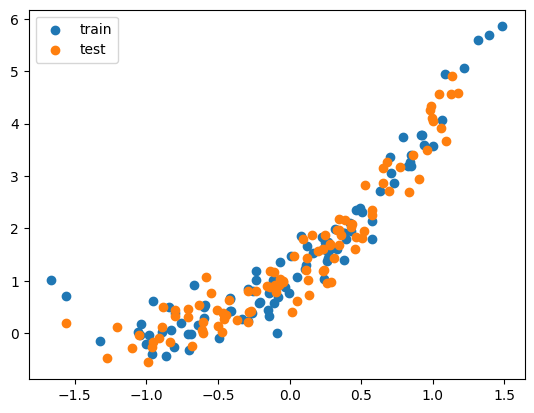

In [ ]:
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
plt.legend()

In [ ]:
def train(net, lr, x_train, y_train, x_test, y_test, epochs=1000):
  losses = []
  test_losses = []
  mse_loss = nn.MSELoss()
  optimizer = optim.SGD(params=net.parameters(), lr=lr)
  for i in tqdm.trange(epochs):
    optimizer.zero_grad()
    y_hat = net(x_train)
    lossi = mse_loss(y_hat, y_train)
    lossi.backward()
    optimizer.step()
    losses.append(lossi.item())

    y_test_hat = net(x_test)
    test_lossi = mse_loss(y_test_hat, y_hat)
    test_losses.append(test_lossi.item())

  return net, losses, test_losses


In [ ]:
net, losses, test_losses = train(net=mlp, lr=1e-2, x_train=x_train, 
                                 y_train=y_train, x_test=x_test, 
                                 y_test=y_test, epochs=1000)

100%|██████████| 1000/1000 [00:01<00:00, 577.50it/s]


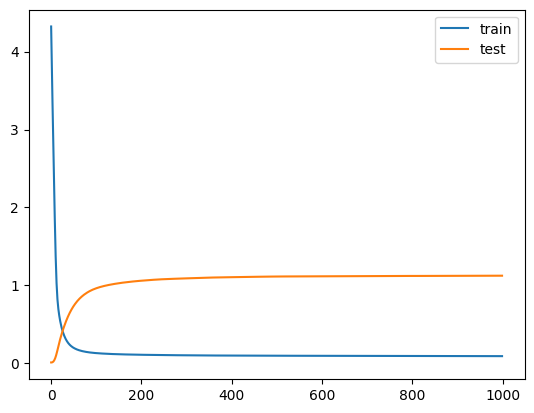

In [ ]:
plt.plot(losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()

In [ ]:
with torch.no_grad():
  y_train_hat = net(x_train)
  y_test_hat = net(x_test)

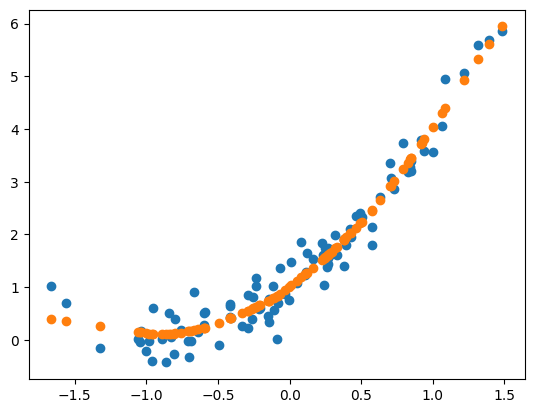

In [ ]:
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, y_train_hat, label='predict')

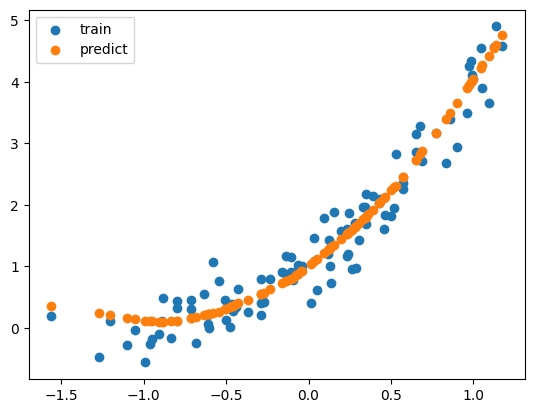

In [ ]:
plt.scatter(x_test, y_test, label='train')
plt.scatter(x_test, y_test_hat, label='predict')
plt.legend()